# <center> Ben Percifield's Rohrshach Project </center>

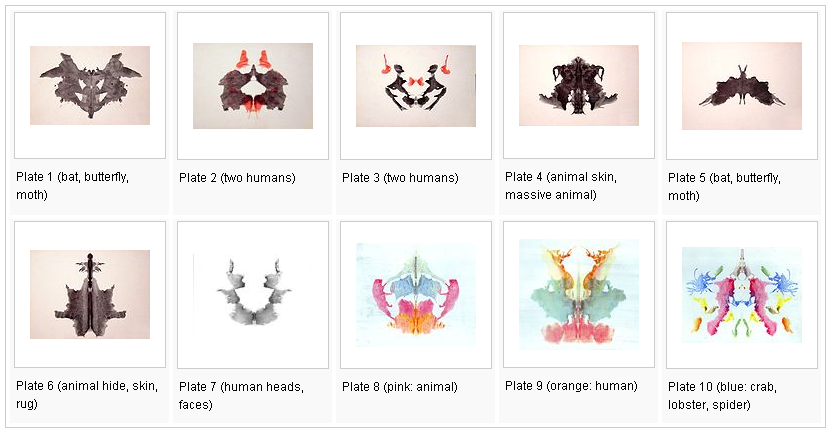

In [1]:
# I didn't realize that the cards are standardized in the inkblot test, see above ^

In [2]:
pip install pycountry-convert

Note: you may need to restart the kernel to use updated packages.


In [3]:
#Import relevant Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import statsmodels.formula.api as smf
from seaborn import pairplot, heatmap
import plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go

In [4]:
#Import relevant Data
data=pd.read_csv('~/Brainstation/Rohrshach/rap_dataset.tsv', sep='\t')
data.head()

,User,PQLevel,Client,Age,Gender,Country,Protocol,TestDate,R,ResponseOrder,...,Determinants,Pair,FormQuality,FQText,Contents,Popular,ZCode,ZScore,SpecialScores,Rejection
0,136,C,31852,28,Male,Israel,32669,4/28/2017 1:06,22,2,...,FC',0,o,NaN,"Hd,Hx",0,ZS,3.5,PHR,0
1,136,C,31852,28,Male,Israel,32669,4/28/2017 1:06,22,1,...,F,1,-,NaN,A,0,NaN,NaN,NaN,0
2,136,C,31852,28,Male,Israel,32669,4/28/2017 1:06,22,3,...,F,1,-,NaN,"Ad,A",0,ZA,3.0,FAB,0
3,136,C,31852,28,Male,Israel,32669,4/28/2017 1:06,22,4,...,C'F,0,-,NaN,Hd,0,ZW,5.5,PHR,0
4,136,C,31852,28,Male,Israel,32669,4/28/2017 1:06,22,5,...,F,1,o,NaN,A,0,NaN,NaN,NaN,0


In [5]:
data.shape

(506480, 24)

# Initial Impressions

<AxesSubplot:>

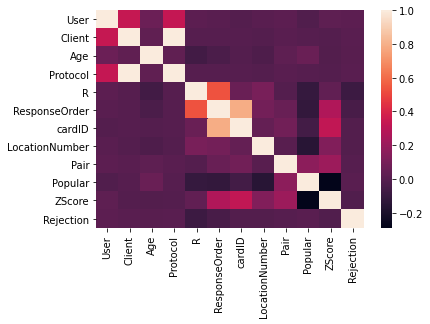

In [6]:
sns.heatmap(data.corr())

<h1>Data Description :</h1>  

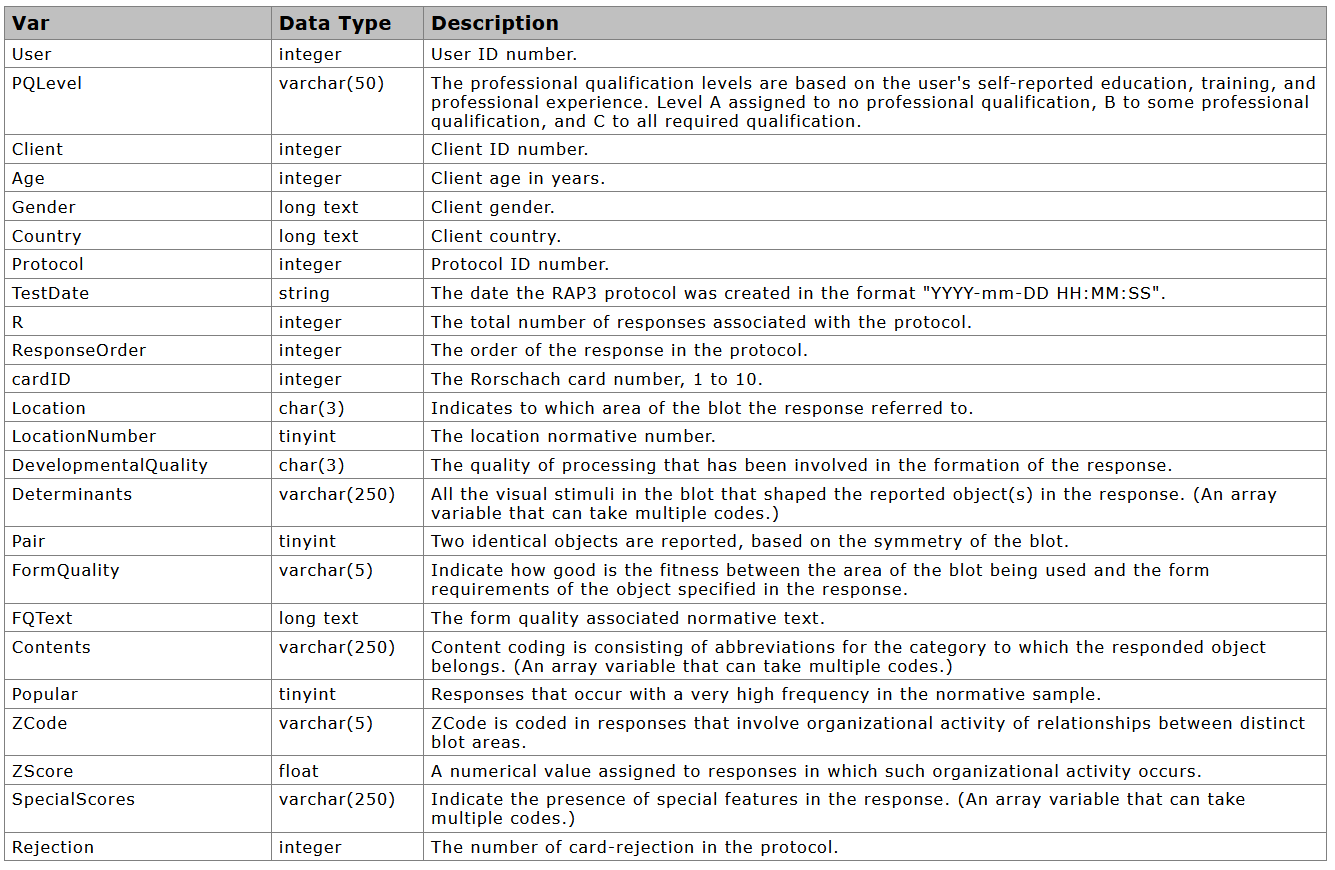

<h1>Notes about the dataset:</h1>
<br>
R ~ 500,000 with ~ 25,000 protocols. 
That puts the average number of responses per protocol to ~ 20 responses per protocol.

In the data cleaning process, protocols with less than 7 responses should be excluded from analytics. This will clean up data from many non-professional protocols.

Another recommended data cleaning is to exclude all 2019 protocols from Ukraine. These protocols are part of our programming development team and constitute artifacts in the data.




 # Data Cleaning - excluding protocols with less than 7 responses

In [7]:
proc_less_than_7 = data[data['R'] < 7]['Protocol'].unique()
proc_less_than_7

array([57886, 46083, 46078, ..., 59293, 59480, 59511])

In [8]:
# Remove protocol with less than 7 responses

data_updated = data[~data.Protocol.isin(proc_less_than_7)]
data_updated

,User,PQLevel,Client,Age,Gender,Country,Protocol,TestDate,R,ResponseOrder,...,Determinants,Pair,FormQuality,FQText,Contents,Popular,ZCode,ZScore,SpecialScores,Rejection
0,136,C,31852,28,Male,Israel,32669,4/28/2017 1:06,22,2,...,FC',0,o,NaN,"Hd,Hx",0,ZS,3.5,PHR,0
1,136,C,31852,28,Male,Israel,32669,4/28/2017 1:06,22,1,...,F,1,-,NaN,A,0,NaN,NaN,NaN,0
2,136,C,31852,28,Male,Israel,32669,4/28/2017 1:06,22,3,...,F,1,-,NaN,"Ad,A",0,ZA,3.0,FAB,0
3,136,C,31852,28,Male,Israel,32669,4/28/2017 1:06,22,4,...,C'F,0,-,NaN,Hd,0,ZW,5.5,PHR,0
4,136,C,31852,28,Male,Israel,32669,4/28/2017 1:06,22,5,...,F,1,o,NaN,A,0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506475,29958,C,58342,55,Female,Italy,59500,9/13/2020 10:05,9,5,...,Ma,1,o,NaN,"H,Cg,Id",1,ZA,3.0,GHR,0
506476,29958,C,58342,55,Female,Italy,59500,9/13/2020 10:05,9,6,...,F,0,o,NaN,Cg,0,NaN,NaN,NaN,0
506477,29958,C,58342,55,Female,Italy,59500,9/13/2020 10:05,9,7,...,F,0,u,NaN,A,0,ZW,2.0,NaN,0
506478,29958,C,58342,55,Female,Italy,59500,9/13/2020 10:05,9,8,...,F,0,o,NaN,A,1,ZW,1.0,NaN,0


In [9]:
#checking
data_updated[data_updated['R'] < 7]

,User,PQLevel,Client,Age,Gender,Country,Protocol,TestDate,R,ResponseOrder,...,Determinants,Pair,FormQuality,FQText,Contents,Popular,ZCode,ZScore,SpecialScores,Rejection


In [10]:
# Exclude 2019 protocols from Ukraine

data_updt_excl = data_updated.loc[~(data_updated['Country'] == 'Ukraine') & ~(pd.to_datetime(data_updated['TestDate']).dt.year == 2019)]
data_updt_excl.head()

,User,PQLevel,Client,Age,Gender,Country,Protocol,TestDate,R,ResponseOrder,...,Determinants,Pair,FormQuality,FQText,Contents,Popular,ZCode,ZScore,SpecialScores,Rejection
0,136,C,31852,28,Male,Israel,32669,4/28/2017 1:06,22,2,...,FC',0,o,NaN,"Hd,Hx",0,ZS,3.5,PHR,0
1,136,C,31852,28,Male,Israel,32669,4/28/2017 1:06,22,1,...,F,1,-,NaN,A,0,NaN,NaN,NaN,0
2,136,C,31852,28,Male,Israel,32669,4/28/2017 1:06,22,3,...,F,1,-,NaN,"Ad,A",0,ZA,3.0,FAB,0
3,136,C,31852,28,Male,Israel,32669,4/28/2017 1:06,22,4,...,C'F,0,-,NaN,Hd,0,ZW,5.5,PHR,0
4,136,C,31852,28,Male,Israel,32669,4/28/2017 1:06,22,5,...,F,1,o,NaN,A,0,NaN,NaN,NaN,0


In [11]:
data_updt_excl.loc[(data_updated['Country'] == 'Ukraine') & (pd.to_datetime(data_updated['TestDate']).dt.year == 2019)]

,User,PQLevel,Client,Age,Gender,Country,Protocol,TestDate,R,ResponseOrder,...,Determinants,Pair,FormQuality,FQText,Contents,Popular,ZCode,ZScore,SpecialScores,Rejection


In [12]:
# Removed Ukraine responses from 2019

In [13]:
pd.to_datetime(data_updated['TestDate'])

0        2017-04-28 01:06:00
1        2017-04-28 01:06:00
2        2017-04-28 01:06:00
3        2017-04-28 01:06:00
4        2017-04-28 01:06:00
                 ...        
506475   2020-09-13 10:05:00
506476   2020-09-13 10:05:00
506477   2020-09-13 10:05:00
506478   2020-09-13 10:05:00
506479   2020-09-13 10:05:00
Name: TestDate, Length: 503475, dtype: datetime64[ns]

# Spilt data into pre & post pandemic
### - pre_pandemic = Jan 1, 2017 - Feb 29, 2020
### - post_pandemic = Mar 1, 2020 - Sep 13, 2020

In [14]:
cut = (pd.to_datetime(data_updt_excl['TestDate']) > '2017-01-01') & (pd.to_datetime(data_updt_excl['TestDate']) <= '2020-02-29')

pre_pandemic = data_updt_excl.loc[cut]
pre_pandemic.tail()

,User,PQLevel,Client,Age,Gender,Country,Protocol,TestDate,R,ResponseOrder,...,Determinants,Pair,FormQuality,FQText,Contents,Popular,ZCode,ZScore,SpecialScores,Rejection
496334,28702,C,55235,23,Male,Finland,56360,2/27/2020 6:14,15,11,...,CF,0,-,NaN,Fd,0,ZW,4.5,ALOG,0
496335,28702,C,55235,23,Male,Finland,56360,2/27/2020 6:14,15,12,...,F,0,u,NaN,Art,0,NaN,NaN,NaN,0
496336,28702,C,55235,23,Male,Finland,56360,2/27/2020 6:14,15,13,...,CF,0,u,NaN,Fd,0,NaN,NaN,MOR,0
496337,28702,C,55235,23,Male,Finland,56360,2/27/2020 6:14,15,14,...,F,0,u,NaN,"Sc,Id",0,ZW,5.5,MOR,0
496338,28702,C,55235,23,Male,Finland,56360,2/27/2020 6:14,15,15,...,F,1,o,NaN,A,1,ZW,5.5,NaN,0


In [15]:
cut2 = (pd.to_datetime(data_updt_excl['TestDate']) >= '2020-03-01') & (pd.to_datetime(data_updt_excl['TestDate']) <= '2020-09-15')

post_pandemic = data_updt_excl.loc[cut2]

In [16]:
post_pandemic.head()

,User,PQLevel,Client,Age,Gender,Country,Protocol,TestDate,R,ResponseOrder,...,Determinants,Pair,FormQuality,FQText,Contents,Popular,ZCode,ZScore,SpecialScores,Rejection
221,272,C,57168,16,Male,Israel,58315,6/29/2020 4:31,14,1,...,F,0,o,Butterfly,A,1,ZW,1.0,NaN,0
222,272,C,57168,16,Male,Israel,58315,6/29/2020 4:31,14,2,...,FC,0,u,"Head (Animal, horned)",A,0,NaN,NaN,NaN,0
223,272,C,57168,16,Male,Israel,58315,6/29/2020 4:31,14,3,...,F,0,o,Lungs,An,0,NaN,NaN,NaN,0
224,272,C,57168,16,Male,Israel,58315,6/29/2020 4:31,14,4,...,F,0,o,Human-Like Figure,(H),1,ZW,2.0,GHR,0
225,272,C,57168,16,Male,Israel,58315,6/29/2020 4:31,14,5,...,F,0,o,NaN,A,1,ZW,1.0,NaN,0


In [17]:
#Let's Check some simple stats
pre_pandemic.describe()

,User,Client,Age,Protocol,R,ResponseOrder,cardID,LocationNumber,Pair,Popular,ZScore,Rejection
count,298743.000000,298743.000000,298743.000000,298743.000000,298743.000000,298743.000000,298743.000000,227229.000000,298743.000000,298743.000000,158708.000000,298743.000000
mean,16048.953462,38799.693502,29.412857,39757.557108,24.029266,12.517217,5.521913,10.482984,0.286239,0.195603,3.045174,0.016673
std,6472.806123,6527.874472,16.742887,6582.870263,9.214229,8.737878,3.027081,25.481817,0.452003,0.396665,1.494079,0.174607
min,136.000000,10656.000000,-1.000000,29415.000000,7.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,11924.000000,33931.000000,17.000000,34832.000000,18.000000,6.000000,3.000000,1.000000,0.000000,0.000000,2.000000,0.000000
50%,17870.000000,38134.000000,25.000000,39079.000000,22.000000,11.000000,6.000000,1.000000,0.000000,0.000000,3.000000,0.000000
75%,20684.000000,42539.000000,38.000000,43545.000000,28.000000,17.000000,8.000000,5.000000,1.000000,0.000000,4.500000,0.000000
max,28702.000000,55270.000000,101.000000,56395.000000,124.000000,124.000000,10.000000,99.000000,1.000000,1.000000,6.500000,7.000000


In [256]:
pre_pandemic.corr()

,User,Client,Age,Protocol,R,ResponseOrder,cardID,LocationNumber,Pair,Popular,ZScore,Rejection
User,1.000000,0.307909,0.034113,0.302383,0.044875,0.023865,-0.000755,0.009065,0.027373,-0.013383,0.026085,0.028626
Client,0.307909,1.000000,0.002373,0.993765,0.013220,0.006838,-0.002821,-0.002526,0.009965,-0.004548,-0.004267,0.013520
Age,0.034113,0.002373,1.000000,0.004479,-0.061268,-0.032352,-0.005559,-0.026172,0.023713,0.059803,-0.011946,0.000327
Protocol,0.302383,0.993765,0.004479,1.000000,0.013400,0.006932,-0.003134,-0.003273,0.009477,-0.004404,-0.004219,0.013329
R,0.044875,0.013220,-0.061268,0.013400,1.000000,0.526987,0.044259,0.105102,0.000648,-0.108768,0.032376,-0.086345
ResponseOrder,0.023865,0.006838,-0.032352,0.006932,0.526987,1.000000,0.791354,0.093402,0.058241,-0.113014,0.269115,-0.045554
cardID,-0.000755,-0.002821,-0.005559,-0.003134,0.044259,0.791354,1.000000,0.044566,0.084924,-0.057654,0.323478,-0.013038
LocationNumber,0.009065,-0.002526,-0.026172,-0.003273,0.105102,0.093402,0.044566,1.000000,0.005911,-0.149394,0.130331,-0.005977
Pair,0.027373,0.009965,0.023713,0.009477,0.000648,0.058241,0.084924,0.005911,1.000000,0.169850,0.207554,0.001410
Popular,-0.013383,-0.004548,0.059803,-0.004404,-0.108768,-0.113014,-0.057654,-0.149394,0.169850,1.000000,-0.288310,0.010618


In [257]:
post_pandemic.describe()

,User,Client,Age,Protocol,R,ResponseOrder,cardID,LocationNumber,Pair,Popular,ZScore,Rejection
count,53250.000000,53250.000000,53250.000000,53250.000000,53250.000000,53250.000000,53250.000000,40856.000000,53250.000000,53250.000000,28422.000000,53250.000000
mean,20246.783061,56832.018779,30.748188,57985.733183,23.576488,12.293934,5.509822,9.718303,0.293934,0.204038,3.029994,0.018141
std,8025.085069,964.495310,16.405871,891.621736,8.841619,8.503547,3.031690,24.425770,0.455566,0.403000,1.510314,0.174125
min,272.000000,34273.000000,0.000000,56420.000000,7.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,14850.000000,56085.000000,18.000000,57225.000000,17.000000,6.000000,3.000000,1.000000,0.000000,0.000000,2.000000,0.000000
50%,21266.000000,56860.000000,27.000000,58007.000000,21.000000,11.000000,5.000000,1.000000,0.000000,0.000000,3.000000,0.000000
75%,27506.000000,57585.000000,41.000000,58738.000000,28.000000,17.000000,8.000000,4.000000,1.000000,0.000000,4.500000,0.000000
max,29958.000000,58365.000000,100.000000,59523.000000,78.000000,78.000000,10.000000,99.000000,1.000000,1.000000,6.500000,4.000000


In [258]:
post_pandemic.corr()

,User,Client,Age,Protocol,R,ResponseOrder,cardID,LocationNumber,Pair,Popular,ZScore,Rejection
User,1.000000,-0.047481,0.050773,-0.066193,0.015762,0.008966,-0.003467,-0.002517,0.017372,-0.018946,0.033717,-0.007096
Client,-0.047481,1.000000,0.046340,0.919445,0.005732,0.003194,-0.000055,-0.000704,-0.012498,0.007333,-0.003090,-0.000847
Age,0.050773,0.046340,1.000000,0.064093,-0.053035,-0.027774,-0.007739,-0.030628,0.025851,0.061808,-0.005504,0.002289
Protocol,-0.066193,0.919445,0.064093,1.000000,-0.001165,-0.000378,-0.000454,-0.001542,-0.011311,0.009747,-0.005790,-0.001937
R,0.015762,0.005732,-0.053035,-0.001165,1.000000,0.519333,0.045760,0.092953,-0.008822,-0.102103,0.020618,-0.094401
ResponseOrder,0.008966,0.003194,-0.027774,-0.000378,0.519333,1.000000,0.798902,0.078143,0.056293,-0.119830,0.278092,-0.049147
cardID,-0.003467,-0.000055,-0.007739,-0.000454,0.045760,0.798902,1.000000,0.032059,0.090657,-0.069403,0.329389,-0.013216
LocationNumber,-0.002517,-0.000704,-0.030628,-0.001542,0.092953,0.078143,0.032059,1.000000,-0.009184,-0.151800,0.127339,-0.007363
Pair,0.017372,-0.012498,0.025851,-0.011311,-0.008822,0.056293,0.090657,-0.009184,1.000000,0.175366,0.216331,-0.000696
Popular,-0.018946,0.007333,0.061808,0.009747,-0.102103,-0.119830,-0.069403,-0.151800,0.175366,1.000000,-0.286879,0.013354


In [18]:
pre_pandemic['Country'].unique().size

134

In [19]:
post_pandemic['Country'].unique().size

75

# Different amount of countries responded to before and after

In [20]:
preinpost = pre_pandemic[pre_pandemic['Country'].isin(post_pandemic['Country'].unique())]
preinpost['Country'].unique().size

64

In [21]:
postinpre = post_pandemic[post_pandemic['Country'].isin(pre_pandemic['Country'].unique())]
postinpre['Country'].unique().size

64

In [22]:
pre_pandemic = preinpost
post_pandemic = postinpre

In [23]:
post_pandemic['Country'].unique().size

64

In [24]:
pre_pandemic['Country'].unique().size

64

In [25]:
pre_pandemic.isna().sum()

User                         0
PQLevel                      0
Client                       0
Age                          0
Gender                       0
Country                      0
Protocol                     0
TestDate                     0
R                            0
ResponseOrder                0
cardID                       0
Location                     0
LocationNumber           69898
DevelopmentalQuality         0
Determinants                 0
Pair                         0
FormQuality                  0
FQText                  255871
Contents                     0
Popular                      0
ZCode                   136498
ZScore                  136498
SpecialScores           170609
Rejection                    0
dtype: int64

# Drop the columns that have too many null values

In [26]:
pre_pandemic=pre_pandemic.drop(['LocationNumber','FQText','ZCode',"ZScore","SpecialScores"],axis=1)

In [27]:
post_pandemic=post_pandemic.drop(['LocationNumber','FQText','ZCode',"ZScore","SpecialScores"],axis=1)

In [28]:
pre_pandemic.isna().sum()

User                    0
PQLevel                 0
Client                  0
Age                     0
Gender                  0
Country                 0
Protocol                0
TestDate                0
R                       0
ResponseOrder           0
cardID                  0
Location                0
DevelopmentalQuality    0
Determinants            0
Pair                    0
FormQuality             0
Contents                0
Popular                 0
Rejection               0
dtype: int64

In [29]:
post_pandemic.isna().sum()

User                    0
PQLevel                 0
Client                  0
Age                     0
Gender                  0
Country                 0
Protocol                0
TestDate                0
R                       0
ResponseOrder           0
cardID                  0
Location                0
DevelopmentalQuality    0
Determinants            0
Pair                    0
FormQuality             0
Contents                0
Popular                 0
Rejection               0
dtype: int64

In [30]:
#Nice, Dropped the null values

In [31]:
#function to convert to alpah2 country codes and continents
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
def get_continent(col):
    try:
         cn_a2_code =  country_name_to_country_alpha2(col)
    except:
        cn_a2_code = 'Unknown' 
    try:
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Unknown' 
    return (cn_continent)

In [32]:
for i in pre_pandemic['Country'].unique():
    print(i + ": " + get_continent(i))

Israel: AS
Argentina: SA
Chile: SA
Afghanistan: AS
Italy: EU
United States (USA): Unknown
Finland: EU
Korea, Republic of: AS
Australia: OC
Morocco: AF
Pakistan: AS
Philippines: AS
Slovenia: EU
China: AS
India: AS
Serbia and Montenegro: Unknown
Albania: EU
Russian Federation: EU
Jamaica: NA
Romania: EU
Brazil: SA
El Salvador: NA
Mexico: NA
Peru: SA
Czech Republic: EU
Tunisia: AF
Portugal: EU
Belgium: EU
Cyprus: AS
Bangladesh: AS
Uruguay: SA
Bahrain: AS
Austria: EU
Greece: EU
Ecuador: SA
Bulgaria: EU
Taiwan: AS
Japan: AS
Barbados: NA
Slovakia: EU
Puerto Rico: NA
Indonesia: AS
Algeria: AF
Canada: NA
France: EU
Ethiopia: AF
Nigeria: AF
Bosnia and Herzegovina: EU
Switzerland: EU
Norway: EU
Azerbaijan: AS
Andorra: EU
South Africa: AF
Germany: EU
Venezuela: SA
Lebanon: AS
Bolivia: SA
Sweden: EU
Poland: EU
Aland (Aland) Islands: Unknown
Costa Rica: NA
Croatia: EU
Malta: EU
Armenia: AS


## Unknown values for United States (USA); Serbia and Montenegro; Aland (Aland) Islands; 

### Reformat:
    - United States (USA) --> United States
    
### Other
    -Serbia and Montenegro --> EU
    -Aland (Aland) Islands --> EU
    

In [33]:
#Format USA to remove parentheses
pre_pandemic.loc[(pre_pandemic['Country']=='United States (USA)')] = pre_pandemic.loc[(pre_pandemic['Country']=='United States (USA)')].replace("United States (USA)", "United States")
post_pandemic.loc[(post_pandemic['Country']=='United States (USA)')] = post_pandemic.loc[(post_pandemic['Country']=='United States (USA)')].replace("United States (USA)", "United States")

# Now adding a continents collumn

In [34]:
pre_pandemic['Continent']= pre_pandemic['Country'].apply(get_continent)

In [35]:
post_pandemic['Continent'] = post_pandemic['Country'].apply(get_continent)

In [36]:
pre_pandemic['Continent'].describe()

count     291472
unique         7
top           EU
freq      134161
Name: Continent, dtype: object

In [37]:
post_pandemic['Continent'].describe()

count     52892
unique        7
top          EU
freq      26329
Name: Continent, dtype: object

In [38]:
post_pandemic['Continent'].unique()

array(['AS', 'EU', 'NA', 'AF', 'SA', 'Unknown', 'OC'], dtype=object)

In [39]:
pre_pandemic.loc[(pre_pandemic['Continent']=='Unknown')] = pre_pandemic.loc[(pre_pandemic['Continent']=='Unknown')].replace("Unknown", "EU")
post_pandemic.loc[(post_pandemic['Continent']=='Unknown')] = post_pandemic.loc[(post_pandemic['Continent']=='Unknown')].replace("Unknown", "EU")

In [40]:
pre_pandemic.loc[(pre_pandemic['Country']=='Serbia and Montenegro')]['Continent'].head()

19731    EU
19732    EU
19733    EU
19734    EU
19735    EU
Name: Continent, dtype: object

In [41]:
pre_pandemic.loc[(pre_pandemic['Country']=='Aland (Aland) Islands')]['Continent'].head()

351467    EU
351468    EU
351469    EU
351585    EU
351586    EU
Name: Continent, dtype: object

#  Simple visualization to see the difference between pre & post 

<AxesSubplot:>

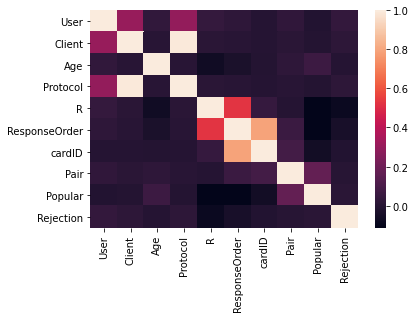

In [285]:
sns.heatmap(pre_pandemic.corr())

<AxesSubplot:>

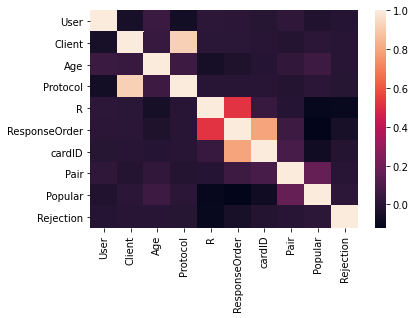

In [286]:
sns.heatmap(post_pandemic.corr())

In [42]:
# More Positive Correlation Between Client/User & Protocol/User pre pandemic

# Popular Answers Before & After the Pandemic

In [44]:
prepopular = pre_pandemic.loc[(pre_pandemic['Popular']==1)]

In [45]:
pre_popular_ratio = prepopular.size / pre_pandemic.size * 100

In [46]:
postpopular = post_pandemic.loc[(post_pandemic['Popular']==1)]

In [47]:
post_popular_ratio = postpopular.size / post_pandemic.size * 100

In [48]:
comppopular = pd.DataFrame({'Pre Popular Ratio':[pre_popular_ratio],'Post Popular Ratio':[post_popular_ratio]})
comppopular

,Pre Popular Ratio,Post Popular Ratio
0,19.575808,20.377373


# Popular answers are a little bit larger share of total responses Post Pandemic

In [49]:
prepair = pre_pandemic.loc[(pre_pandemic['Pair']==1)]

In [50]:
pre_pair_ratio = prepair.size / pre_pandemic.size * 100

In [51]:
postpair = post_pandemic.loc[(post_pandemic['Pair']==1)]

In [52]:
post_pair_ratio = postpair.size / post_pandemic.size * 100

In [53]:
comppair = pd.DataFrame({'Pre Pair Ratio':[pre_pair_ratio],'Post Pair Ratio':[post_pair_ratio]})
comppair

,Pre Pair Ratio,Post Pair Ratio
0,28.62196,29.42411


# Paired answers are a little bit larger share of total responses Post Pandemic

In [54]:
for i in pre_pandemic.select_dtypes(include='object').columns:
    print(i,len(pre_pandemic[i].unique()))
    
# Getting the number of unique values for categorical columns

PQLevel 3
Gender 3
Country 64
TestDate 13482
Location 6
DevelopmentalQuality 4
Determinants 4481
FormQuality 5
Contents 5339
Continent 6


# <center> Categories with <10 unique values:  </center>

In [55]:
pre_pandemic['Location'].unique()

array(['WS', 'D', 'Dd', 'DdS', 'W', 'DS'], dtype=object)

# Location of Responses <br>
<li> W: Whole Response</li>
<li> D: Common Detail Response </li>
<li> Dd: Unusual Detail Response </li>
<li> Ws: Whole Response, but also using whitespace in response </li>
<li> DS Common Detail Reponse, but also using whitespace in response</li>
<li> DdS: Unusual Detail Response, but also using whitespace in response </li>

In [56]:
pre_pandemic['Location'].mode()

0    D
dtype: object

In [57]:
post_pandemic['Location'].mode()

0    D
dtype: object

Text(0.5, 1.0, 'Distribution of Gender by Location in Pre Pandemic')

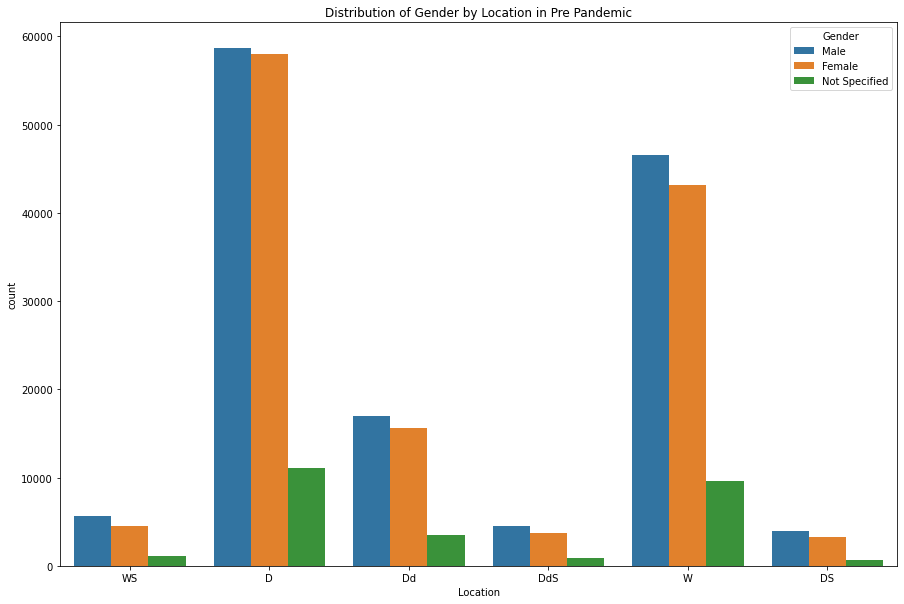

In [58]:
plt.figure(figsize=(15,10))
sns.countplot(x='Location',hue='Gender',data=pre_pandemic)
plt.title("Distribution of Gender by Location in Pre Pandemic")

Text(0.5, 1.0, 'Distribution of Gender by Location in Post Pandemic')

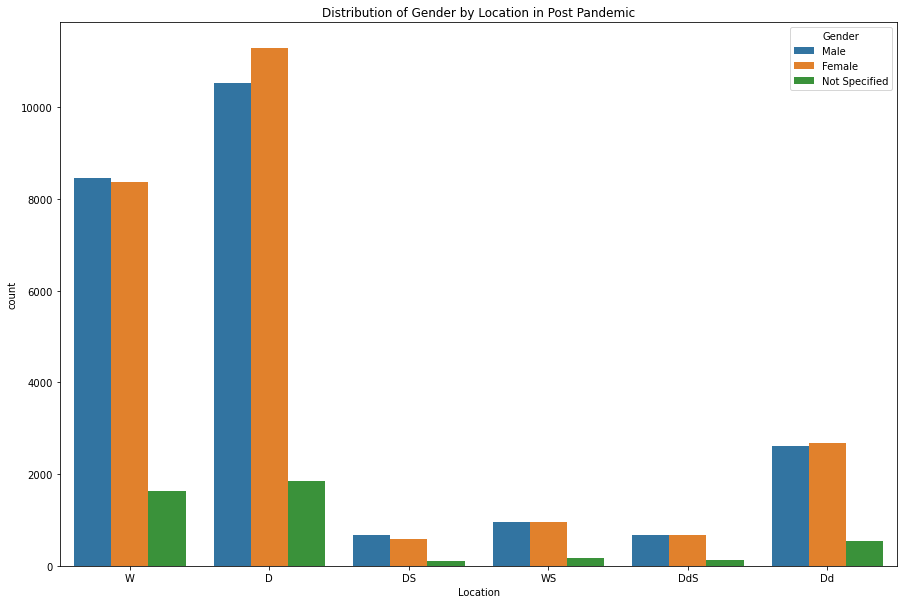

In [59]:
plt.figure(figsize=(15,10))
sns.countplot(x='Location',hue='Gender',data=post_pandemic)
plt.title("Distribution of Gender by Location in Post Pandemic")

# Professional Qualificaiton Level <br>
<li>C: All Professional Qualifications</li>
<li>B: Some Professional Qualifications</li>
<li>A: no Professional Qualifications</li>

In [60]:
pre_pandemic['PQLevel'].unique()

array(['C', 'B', 'A'], dtype=object)

In [61]:
pre_pandemic['PQLevel'].mode()

0    C
dtype: object

In [196]:
post_pandemic['PQLevel'].mode()

0    C
dtype: object

Text(0.5, 1.0, 'Distribution of Gender by PQLevel in Pre Pandemic')

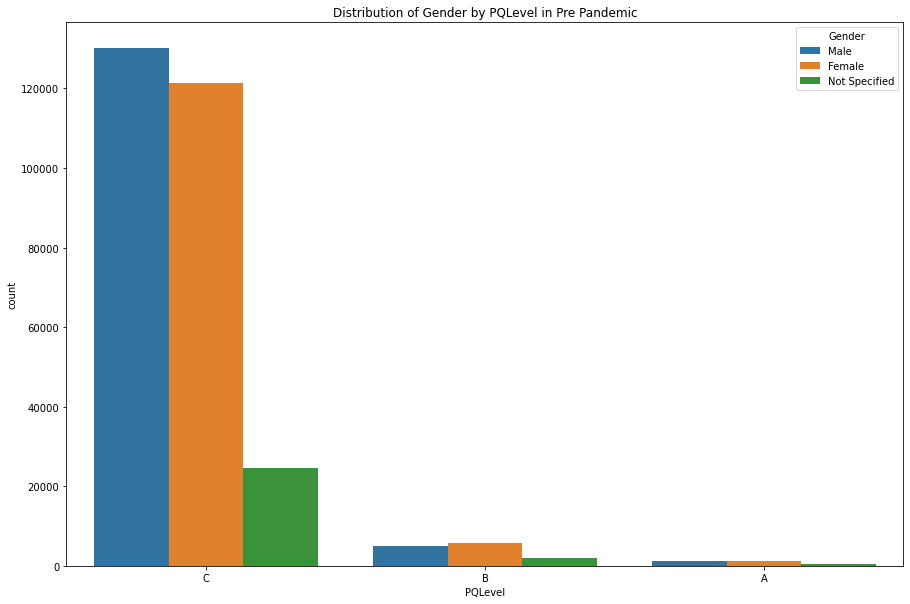

In [197]:
plt.figure(figsize=(15,10))
sns.countplot(x='PQLevel',hue='Gender',data=pre_pandemic)
plt.title("Distribution of Gender by PQLevel in Pre Pandemic")

Text(0.5, 1.0, 'Distribution of Gender by PQLevel in Post Pandemic')

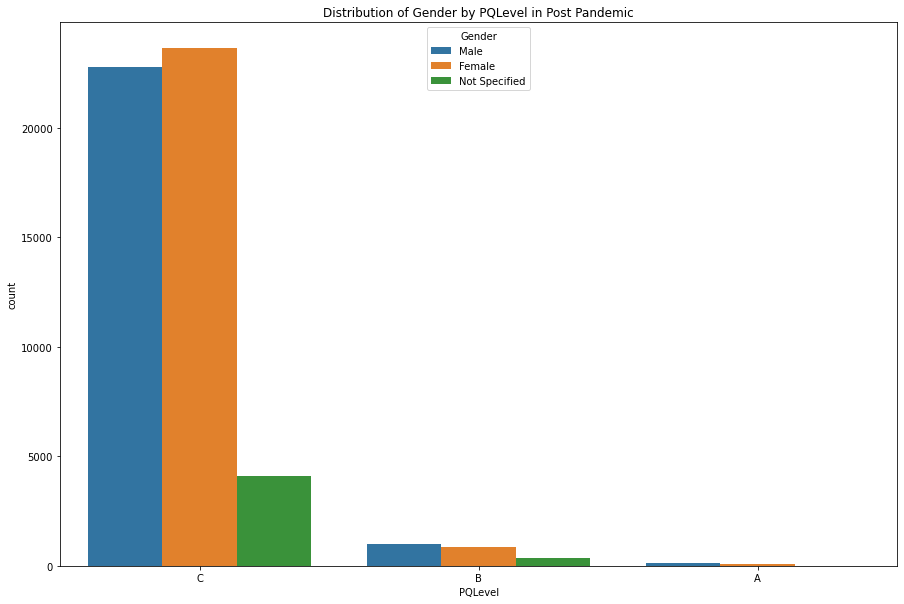

In [198]:
plt.figure(figsize=(15,10))
sns.countplot(x='PQLevel',hue='Gender',data=post_pandemic)
plt.title("Distribution of Gender by PQLevel in Post Pandemic")

# Gender <br>
<li>Male</li>
<li>Female</li>
<li>Not Specified</li>

In [199]:
pre_pandemic['Gender'].unique()

array(['Male', 'Female', 'Not Specified'], dtype=object)

In [200]:
pre_pandemic['Gender'].mode()

0    Male
dtype: object

In [201]:
post_pandemic['Gender'].mode()

0    Female
dtype: object

Text(0.5, 1.0, 'Distribution of Gender by PQLevel in Pre Pandemic')

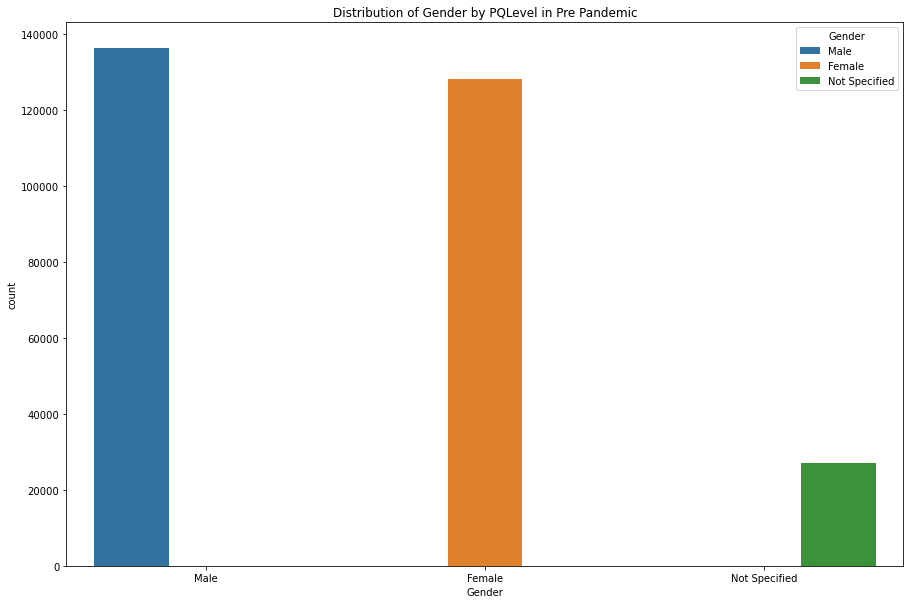

In [64]:
plt.figure(figsize=(15,10))
sns.countplot(x='Gender',hue='Gender',data=pre_pandemic)
plt.title("Distribution of Gender by PQLevel in Pre Pandemic")

Text(0.5, 1.0, 'Distribution of Gender by Gender in Post Pandemic')

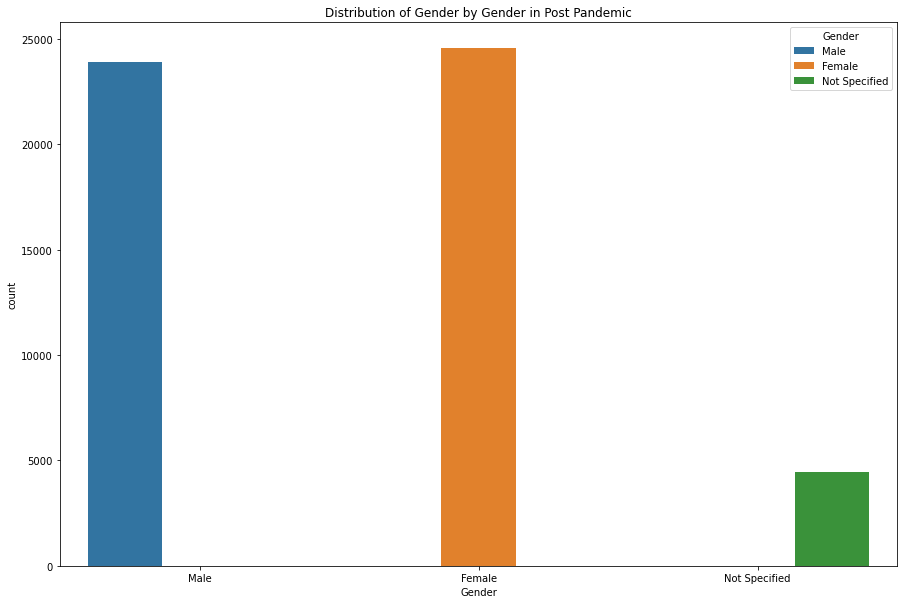

In [66]:
plt.figure(figsize=(15,10))
sns.countplot(x='Gender',hue='Gender',data=post_pandemic)
plt.title("Distribution of Gender by Gender in Post Pandemic")

# <center> Women were more likely to take the Rohrshach test after the pandemic

In [62]:
pre_pandemic['DevelopmentalQuality'].unique()

array(['o', '+', 'v', 'v/+'], dtype=object)

# Developmental Quality <br>
<li>o: Ordinary Response. <br> A single object is described from an area of the inkblot, and the description creates a specific form demand. The object has features that emphasize its outline and structural features. <br> Two objects are described with no meaningful relationship between them.<br>Example: “One bird” or “Two birds.”</li><br>
<li>+: Synthesized Response. <br> One or more objects are described as separate but related through position or movement. At least one of the objects must have a specific form demand or be described in a manner that creates a specific form demand. <br>
Example: “Bird flying in a cloud” or “Two birds sitting on telephone wire.</li><br>
<li>v: Vague Response. <br> One or more unrelated objects are described without a specific form demand, outline, or structural features. <br> Example: “One cloud” or “Two clouds.”</li><br>
<li>v/+ Synthesized Response <br> Two or more objects are described as separate but related. None of the objects have a specific form, and the description during inquiry does not introduce a form demand. <br> Example: “Two clouds coming together.”</li><br>

In [63]:
pre_pandemic['DevelopmentalQuality'].mode()

0    o
dtype: object

In [64]:
post_pandemic['DevelopmentalQuality'].mode()

0    o
dtype: object

Text(0.5, 1.0, 'Distribution of Gender by DevelopmentalQuality in Pre Pandemic')

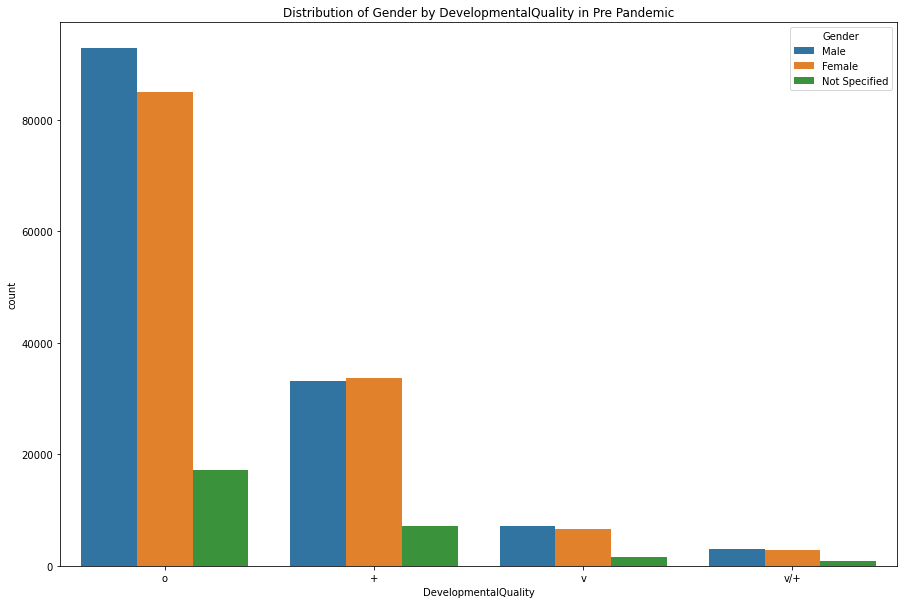

In [65]:
plt.figure(figsize=(15,10))
sns.countplot(x='DevelopmentalQuality',hue='Gender',data=pre_pandemic)
plt.title("Distribution of Gender by DevelopmentalQuality in Pre Pandemic")

Text(0.5, 1.0, 'Distribution of Gender by DevelopmentalQuality in Post Pandemic')

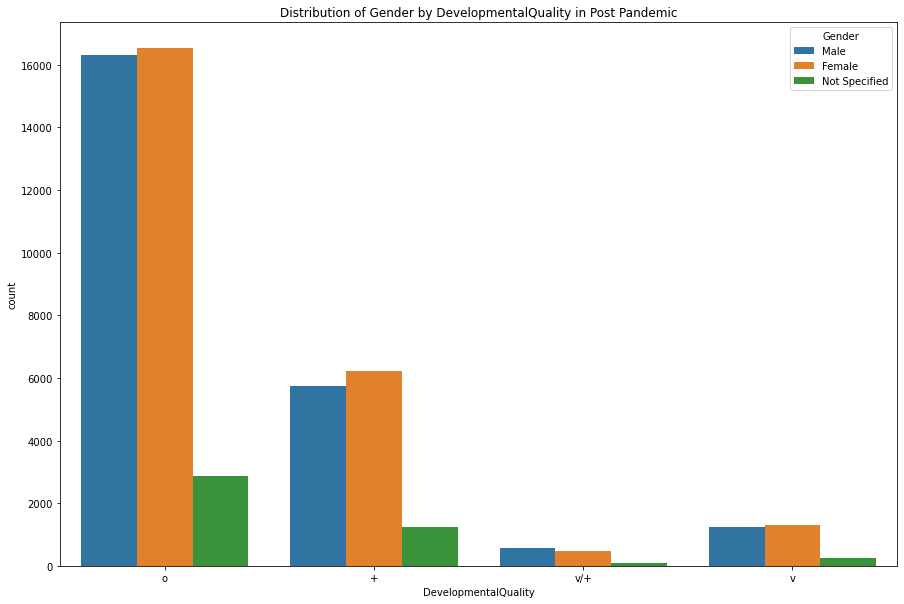

In [66]:
plt.figure(figsize=(15,10))
sns.countplot(x='DevelopmentalQuality',hue='Gender',data=post_pandemic)
plt.title("Distribution of Gender by DevelopmentalQuality in Post Pandemic")

In [67]:
# Women more likely to respond o deveolopment quality post pandemic

In [68]:
pre_pandemic['FormQuality'].unique()

array(['o', '-', 'u', 'none', '+'], dtype=object)

# Form Quality <br>
<li>o: Ordinary</li>
<li>-: Minus</li>
<li>u: Unusual</li>
<li>none: no form quality</li>
<li>+: Superior-overelaborated</li>

In [69]:
pre_pandemic['FormQuality'].mode()

0    o
dtype: object

In [70]:
post_pandemic['FormQuality'].mode()

0    o
dtype: object

Text(0.5, 1.0, 'Distribution of Gender by FormQuality in Pre Pandemic')

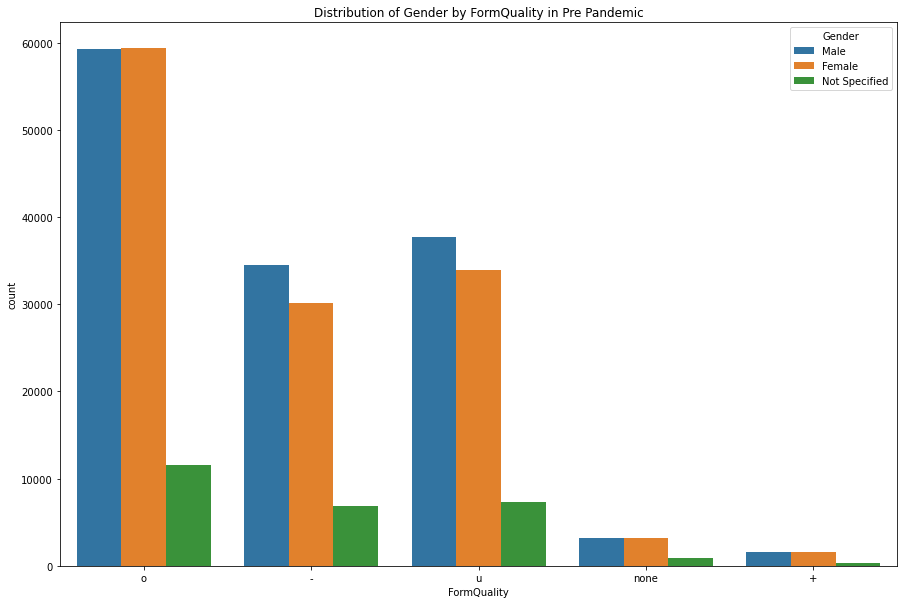

In [71]:
plt.figure(figsize=(15,10))
sns.countplot(x='FormQuality',hue='Gender',data=pre_pandemic)
plt.title("Distribution of Gender by FormQuality in Pre Pandemic")

Text(0.5, 1.0, 'Distribution of Gender by FormQuality in Post Pandemic')

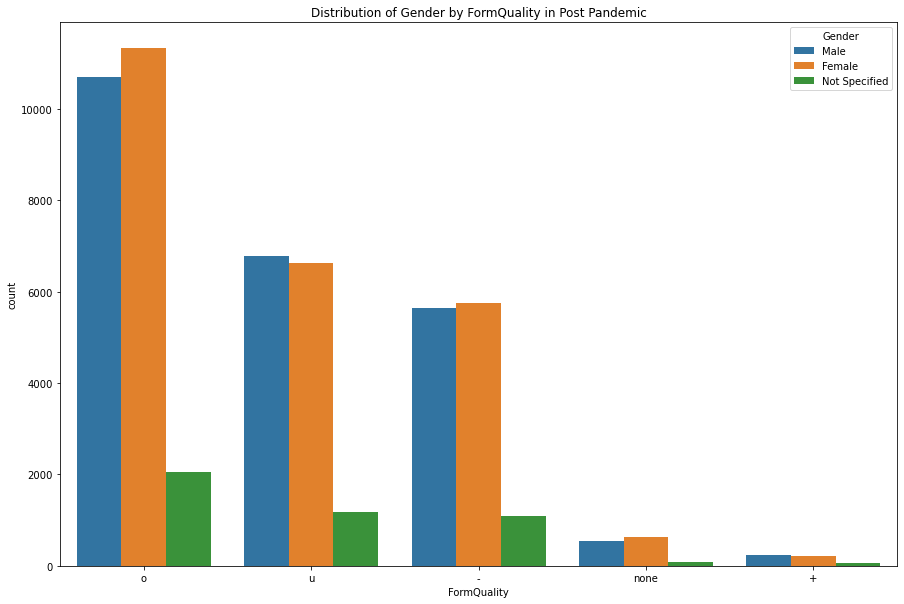

In [72]:
plt.figure(figsize=(15,10))
sns.countplot(x='FormQuality',hue='Gender',data=post_pandemic)
plt.title("Distribution of Gender by FormQuality in Post Pandemic")

In [73]:
#Switch between u and - for the 2nd and 3rd most popular form qualities

In [74]:
pre_pandemic['Continent'].unique()

array(['AS', 'SA', 'EU', 'NA', 'OC', 'AF'], dtype=object)

# Continent <br>
<li>AS: Asia</li>
<li>SA: South America</li>
<li>EU: European Union</li>
<li>NA: North America</li>
<li>OC: Oceania</li>
<li>AF: Africa</li>

In [457]:
pre_pandemic['Continent'].mode()

0    EU
dtype: object

In [458]:
post_pandemic['Continent'].mode()

0    EU
dtype: object

Text(0.5, 1.0, 'Distribution of Gender by Continent in Pre Pandemic')

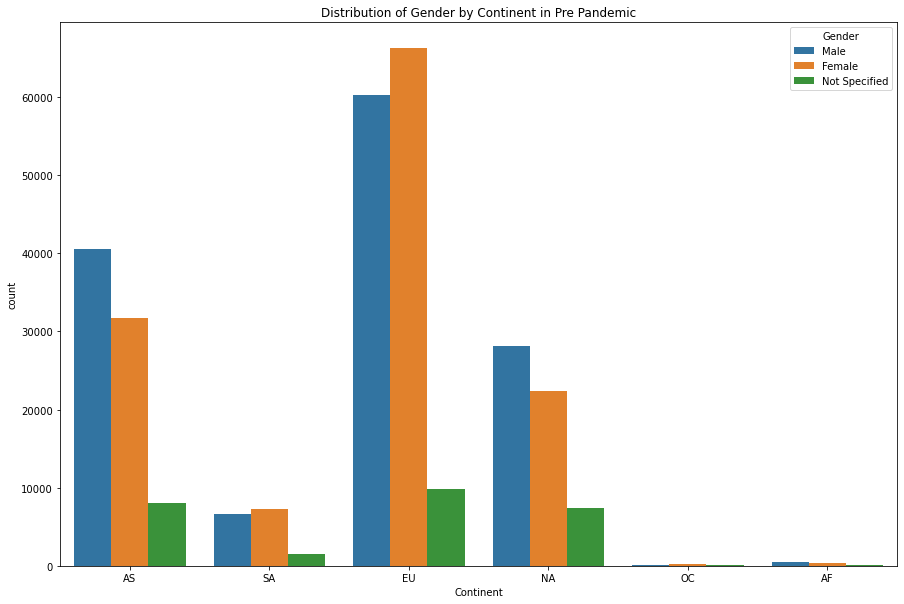

In [72]:
plt.figure(figsize=(15,10))
sns.countplot(x='Continent',hue='Gender',data=pre_pandemic)
plt.title("Distribution of Gender by Continent in Pre Pandemic")

Text(0.5, 1.0, 'Distribution of Gender by Continent in Post Pandemic')

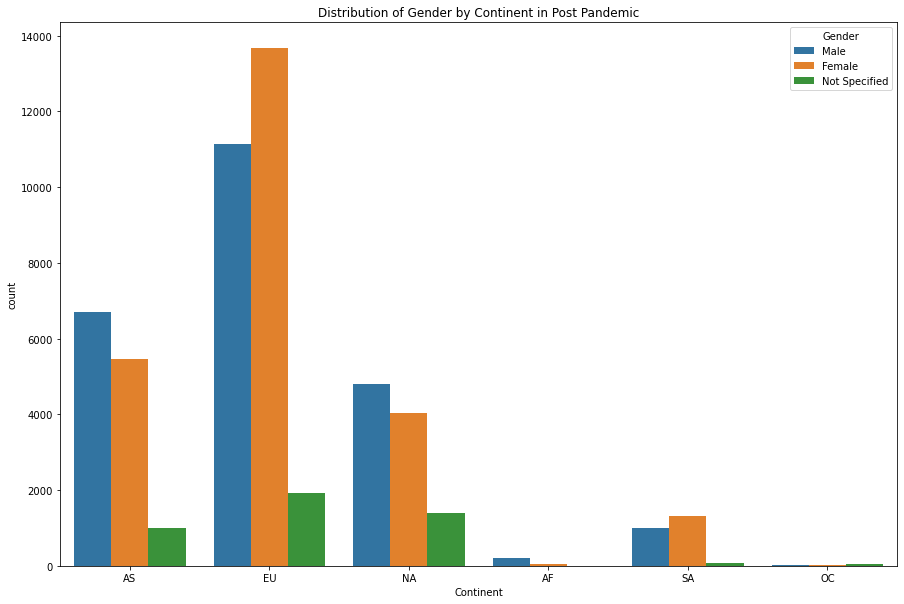

In [73]:
plt.figure(figsize=(15,10))
sns.countplot(x='Continent',hue='Gender',data=post_pandemic)
plt.title("Distribution of Gender by Continent in Post Pandemic")

# <center> Numerical collumns with <10 unique values </center>

In [59]:
for i in prepopular.select_dtypes(include='int64').columns:
    print(i,len(pre_pandemic[i].unique()))
    
# Getting the number of unique values for numerical columns

User 3359
Client 13585
Age 101
Protocol 13628
R 67
ResponseOrder 124
cardID 10
Pair 2
Popular 2
Rejection 7


In [424]:
pre_pandemic['cardID'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

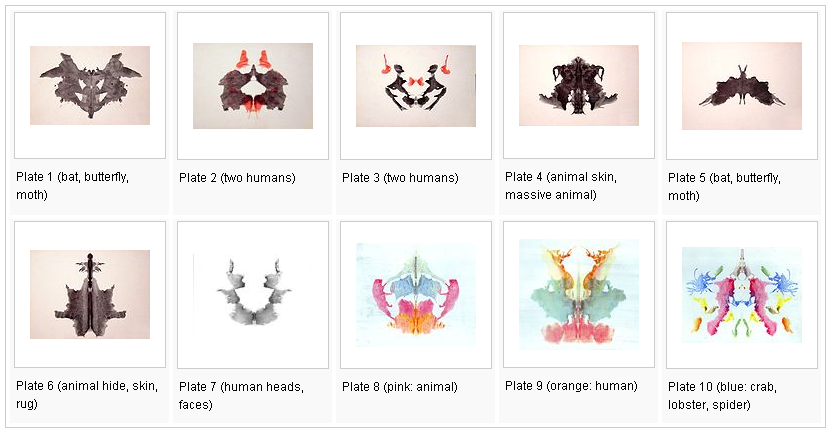

In [61]:
pre_pandemic['Pair'].unique()

array([0, 1])

# Pair <br>
<li>0: just an observation</li>
<li>1: that observation is a pair</li>

In [75]:
pre_pandemic['Pair'].mean()*100

28.621960256902895

In [76]:
post_pandemic['Pair'].mean()*100

29.424109506163504

In [77]:
# Slightly more paired responses

In [78]:
pre_pandemic['Popular'].unique()

array([0, 1])

# Popular <br>
<li>0: not a popular response</li>
<li>1: it's a popular response!</li>

In [79]:
pre_pandemic['Popular'].mean()*100

19.575808310918372

In [80]:
post_pandemic['Popular'].mean()*100

20.377372759585572

In [81]:
# Slightly more popular responses after the pandemic

In [82]:
pre_pandemic['Rejection'].unique()

array([0, 1, 2, 5, 3, 7, 4])

# Rejection <br>
The number of card-rejection in the protocol<br>
<li>0 - No Rejection</li>
<li>1 - ?</li>
<li>2 - ?</li>
<li>3 - ?</li>
<li>4 - ?</li>
<li>5 - ?</li>
<li>7 - ?</li>

In [83]:
pre_pandemic.loc[(pre_pandemic['Rejection']==7)]['cardID'].unique()

array([ 1,  5, 10,  9,  2])

In [84]:
# Rejection is not referring to the specific card, being rejected 🤔 so I don't really know what it's referring to then

In [85]:
# Contents which can be interpreted as negative: Bl - Blood, Ex - Explosion, Fi - Fire

In [86]:
for i in pre_pandemic['Contents']:
    if "Bl" in i and "Ex" in i and "Fi" in i: 
       print(i)

Bl,Ex,Fi,Sc


In [87]:
for i in post_pandemic['Contents']:
    if "Bl" in i and "Ex" in i and "Fi" in i: 
       print(i)

Hd,Bl,Ex,Fi


In [88]:
pre_pandemic.loc[(pre_pandemic['Contents']=='Bl,Ex,Fi,Sc')]


,User,PQLevel,Client,Age,Gender,Country,Protocol,TestDate,R,ResponseOrder,cardID,Location,DevelopmentalQuality,Determinants,Pair,FormQuality,Contents,Popular,Rejection,Continent
171735,15504,C,41087,36,Female,Israel,42065,6/9/2018 16:52,24,4,2,WS,+,"ma,CF",0,o,"Bl,Ex,Fi,Sc",0,0,AS


In [89]:
post_pandemic.loc[(post_pandemic['Contents']=='Hd,Bl,Ex,Fi')]

,User,PQLevel,Client,Age,Gender,Country,Protocol,TestDate,R,ResponseOrder,cardID,Location,DevelopmentalQuality,Determinants,Pair,FormQuality,Contents,Popular,Rejection,Continent
58313,8078,C,57804,48,Male,Israel,58960,8/5/2020 11:41,17,16,8,W,+,"ma,FD",0,-,"Hd,Bl,Ex,Fi",0,0,AS


In [90]:
# Israel had both respondents that had all negatively coded contents, not the same card or respondent though.

In [91]:
prebloodcount = 0
for i in pre_pandemic['Contents']:
    if "Bl" in i:
        prebloodcount = prebloodcount +1
prebloodratio = prebloodcount / pre_pandemic['Contents'].size * 100

In [92]:
postbloodcount = 0
for i in post_pandemic['Contents']:
    if "Bl" in i:
        postbloodcount = postbloodcount +1
postbloodratio = postbloodcount / pre_pandemic['Contents'].size * 100

In [93]:
compblood = pd.DataFrame({'Pre Blood Ratio':[prebloodratio],'Post Blood Ratio':[postbloodratio]})
compblood

,Pre Blood Ratio,Post Blood Ratio
0,1.508893,0.287163


In [94]:
# Noticeable drop in the percentage share of blood in responses for Contents

In [95]:
# interesting that the salience of health bc pandemic has decreased the proportionality of blood in responses (this is counterintuitive)

In [96]:
prefirecount = 0
for i in pre_pandemic['Contents']:
    if "Fi" in i:
        prefirecount = prefirecount +1
prefireratio = prefirecount / pre_pandemic['Contents'].size * 100

In [97]:
postfirecount = 0
for i in post_pandemic['Contents']:
    if "Fi" in i:
        postfirecount = postfirecount +1
postfireratio = postfirecount / post_pandemic['Contents'].size * 100

In [98]:
compfire = pd.DataFrame({'Pre Fire Ratio':[prefireratio],'Post Fire Ratio':[postfireratio]})
compfire

,Pre Fire Ratio,Post Fire Ratio
0,1.697933,1.567345


In [99]:
# Negligable drop in the percentage share of Fire in responses for Contents

In [100]:
pre_explosion_count = 0
for i in pre_pandemic['Contents']:
    if "Ex" in i:
        pre_explosion_count = pre_explosion_count +1
pre_explosion_ratio = pre_explosion_count / pre_pandemic['Contents'].size * 100

In [101]:
post_explosion_count = 0
for i in post_pandemic['Contents']:
    if "Ex" in i:
        post_explosion_count = post_explosion_count +1
post_explosion_ratio = post_explosion_count / post_pandemic['Contents'].size * 100

In [102]:
comp_explosion = pd.DataFrame({'Pre Explosion Ratio':[pre_explosion_ratio],'Post Explosion Ratio':[post_explosion_ratio]})
comp_explosion

,Pre Explosion Ratio,Post Explosion Ratio
0,0.585648,0.55774


In [103]:
# Negligable drop in the percentage share of Explosions in responses for Contents

In [104]:
# Sx = Sex (Just bc I am curious, not saying it is a gauge of negative sentiment)

In [105]:
pre_sex_count = 0
for i in pre_pandemic['Contents']:
    if "Sx" in i:
        pre_sex_count = pre_sex_count +1
pre_sex_ratio = pre_sex_count / pre_pandemic['Contents'].size * 100

In [106]:
post_sex_count = 0
for i in post_pandemic['Contents']:
    if "Sx" in i:
        post_sex_count = post_sex_count +1
post_sex_ratio = post_sex_count / post_pandemic['Contents'].size * 100

In [107]:
comp_sex = pd.DataFrame({'Pre Sex Ratio':[pre_sex_ratio],'Post Sex Ratio':[post_sex_ratio]})
comp_sex

,Pre Sex Ratio,Post Sex Ratio
0,1.163405,1.242154


In [108]:
# Slightly greater responses including Sex. 

# <center> Data Modelling </center>

In [332]:
pre_pandemic_Age = smf.ols("Age ~ Gender + PQLevel + Continent", pre_pandemic).fit()
pre_pandemic_Age.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     1660.
Date:                Wed, 12 May 2021   Prob (F-statistic):               0.00
Time:                        12:41:24   Log-Likelihood:            -1.2262e+06
No. Observations:              291472   AIC:                         2.452e+06
Df Residuals:                  291462   BIC:                         2.453e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  30.7430      0.642     47.863      0.000      29.484      32.002
Gender[T.Male]             -0.8515      0.063    -13.421      0.000      -0.976      -0.727
Gender[T.Not Specified]    -0.7891      0.109     -7.212      0.000      -1.004      -0.575
PQLevel[T.B]                0.4635      0.338      1.370      0.171      -0.200       1.127
PQLevel[T.C]               -0.2739      0.308     -0.890      0.373      -0.877       0.329
Continent[T.AS]            -5.6178      0.571     -9.836      0.000      -6.737      -4.498
Continent[T.EU]             1.7626      0.570      3.092      0.002       0.645       2.880
Continent[T.NA]            -1.9832      0.572     -3.466      0.001      -3.105      -0.862
Continent[T.OC]             6.1288      0.907      6.759      0.000       4.352       7.906
Continent[T.SA]             7.0929      0.583     12.164      0.000       5.950       8.236
==============================================================================
Omnibus:                    54938.264   Durbin-Watson:                   0.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           107350.238
Skew:                           1.151   Prob(JB):                         0.00
Kurtosis:                       4.880   Cond. No.                         75.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [333]:
post_pandemic_Age = smf.ols("Age ~ Gender + PQLevel + Continent", post_pandemic).fit()
post_pandemic_Age.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     176.2
Date:                Wed, 12 May 2021   Prob (F-statistic):               0.00
Time:                        12:41:36   Log-Likelihood:            -2.2235e+05
No. Observations:               52892   AIC:                         4.447e+05
Df Residuals:                   52882   BIC:                         4.448e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  29.0641      1.584     18.348      0.000      25.959      32.169
Gender[T.Male]              0.0015      0.148      0.010      0.992      -0.289       0.292
Gender[T.Not Specified]     2.3093      0.266      8.683      0.000       1.788       2.831
PQLevel[T.B]                4.8170      1.247      3.862      0.000       2.373       7.261
PQLevel[T.C]                2.3708      1.200      1.975      0.048       0.018       4.723
Continent[T.AS]            -4.1920      1.037     -4.043      0.000      -6.224      -2.160
Continent[T.EU]             1.0687      1.032      1.035      0.301      -0.955       3.092
Continent[T.NA]            -3.3056      1.039     -3.183      0.001      -5.341      -1.270
Continent[T.OC]            20.0227      1.987     10.079      0.000      16.129      23.917
Continent[T.SA]             3.5913      1.079      3.329      0.001       1.477       5.706
==============================================================================
Omnibus:                     7319.241   Durbin-Watson:                   0.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11532.807
Skew:                           0.973   Prob(JB):                         0.00
Kurtosis:                       4.202   Cond. No.                         62.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [339]:
# Lower Adj. R-squared means that there is a stronger predictive power for age given gender, professional level, and continent post pandemic. 
# Strangely enough Male becomes less predictive of Age post Pandemic?

In [338]:
pre_pandemic_continent = smf.ols("R ~ Location + DevelopmentalQuality + FormQuality + cardID", pre_pandemic).fit()
pre_pandemic_continent.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      R   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     700.4
Date:                Wed, 12 May 2021   Prob (F-statistic):               0.00
Time:                        12:46:06   Log-Likelihood:            -1.0561e+06
No. Observations:              291472   AIC:                         2.112e+06
Df Residuals:                  291458   BIC:                         2.112e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      24.0149      0.158    151.541      0.000      23.704      24.326
Location[T.DS]                  0.6426      0.106      6.077      0.000       0.435       0.850
Location[T.Dd]                  1.3933      0.055     25.153      0.000       1.285       1.502
Location[T.DdS]                 1.6321      0.099     16.455      0.000       1.438       1.826
Location[T.W]                  -2.2931      0.039    -58.764      0.000      -2.370      -2.217
Location[T.WS]                 -1.4811      0.091    -16.350      0.000      -1.659      -1.304
DevelopmentalQuality[T.o]       0.6929      0.039     17.581      0.000       0.616       0.770
DevelopmentalQuality[T.v]       0.3540      0.091      3.874      0.000       0.175       0.533
DevelopmentalQuality[T.v/+]     0.0557      0.116      0.478      0.632      -0.172       0.284
FormQuality[T.-]                0.1111      0.157      0.707      0.480      -0.197       0.419
FormQuality[T.none]            -0.3314      0.197     -1.679      0.093      -0.718       0.055
FormQuality[T.o]               -0.7427      0.155     -4.782      0.000      -1.047      -0.438
FormQuality[T.u]                0.3271      0.157      2.087      0.037       0.020       0.634
cardID                          0.0630      0.006     10.933      0.000       0.052       0.074
==============================================================================
Omnibus:                   126264.675   Durbin-Watson:                   0.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1036217.739
Skew:                           1.892   Prob(JB):                         0.00
Kurtosis:                      11.427   Cond. No.                         133.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [341]:
post_pandemic_continent = smf.ols("R ~ Location + DevelopmentalQuality + FormQuality + cardID", post_pandemic).fit()
post_pandemic_continent.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      R   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     110.6
Date:                Wed, 12 May 2021   Prob (F-statistic):          1.57e-295
Time:                        12:46:51   Log-Likelihood:            -1.8968e+05
No. Observations:               52892   AIC:                         3.794e+05
Df Residuals:                   52878   BIC:                         3.795e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      23.2852      0.402     57.957      0.000      22.498      24.073
Location[T.DS]                  0.4283      0.244      1.759      0.079      -0.049       0.906
Location[T.Dd]                  0.9964      0.131      7.623      0.000       0.740       1.253
Location[T.DdS]                 0.5169      0.237      2.182      0.029       0.053       0.981
Location[T.W]                  -2.1221      0.088    -24.242      0.000      -2.294      -1.951
Location[T.WS]                 -1.7189      0.203     -8.447      0.000      -2.118      -1.320
DevelopmentalQuality[T.o]       0.9495      0.090     10.590      0.000       0.774       1.125
DevelopmentalQuality[T.v]       0.9983      0.210      4.745      0.000       0.586       1.411
DevelopmentalQuality[T.v/+]     0.7292      0.272      2.681      0.007       0.196       1.262
FormQuality[T.-]                0.0507      0.399      0.127      0.899      -0.732       0.833
FormQuality[T.none]            -0.1911      0.487     -0.392      0.695      -1.146       0.764
FormQuality[T.o]               -0.5357      0.395     -1.357      0.175      -1.310       0.238
FormQuality[T.u]                0.6121      0.398      1.539      0.124      -0.168       1.392
cardID                          0.0590      0.013      4.520      0.000       0.033       0.085
==============================================================================
Omnibus:                    16638.152   Durbin-Watson:                   0.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            56050.157
Skew:                           1.595   Prob(JB):                         0.00
Kurtosis:                       6.906   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [342]:
# Except for FormQuality[T.u] all values are off same direction and less magnitude

# Some Interactive Graphs

In [1]:
import plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
pre_Age=pre_pandemic.Age
post_Age=post_pandemic.Age

trace1 = go.Histogram(
    x=pre_Age,
    opacity=0.75,
    name = "Pre_Pandemic Age",
    marker=dict(color='rgba(171, 50, 96, 0.6)'))
trace2 = go.Histogram(
    x=post_Age,
    opacity=0.75,
    name ='Post_pandemic Age',
    marker=dict(color='rgba(12, 50, 196, 0.6)'))

data = [trace1, trace2]
layout = go.Layout(title=' Distribution of Age pre and post pandemic',
                   xaxis=dict(title='Age'),
                   yaxis=dict( title='Count'),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

NameError: name 'pre_pandemic' is not defined